In [50]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## 1 简便查看
*常用方法：data.info()，data.shape，data.head()，data.tail()*



In [51]:
listings_df = pd.read_csv("datalab/231715/listings.csv")
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
2,128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
3,161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
4,162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [52]:
print("shape: ", listings_df.shape, "\n")
listings_df.info()

shape:  (28452, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28452 entries, 0 to 28451
Data columns (total 16 columns):
id                                28452 non-null int64
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  2

## 2 缺失值
通过缺失值可以对数据集有个更好地认识，虽然这个notebook主要是分享做地理图，处理缺失值没有什么用处~

通过上面.info得出的信息可以看到缺失值情况如下：

+ "name"列1个; 
+ "neighbourhood_group"列全部
+ "last_review", "reviews_per_month"列11158个

In [53]:
listings_df["last_review"].isnull().sum()

11158

#### 2.1 "neighbourhood_group"

删除特征（删除整列）

*方法：*

+ *行删除 - data.drop([1,3])；列删除 - data.drop(["id", "name"], axis=1)*
+ *del data["id"]*

In [54]:
listings_df = listings_df.drop("neighbourhood_group", axis=1)

#### 2.2 "name"
应该为录入失误，影响不大，这里选择删除案例

In [55]:
listings_df[listings_df["name"].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
456,7775603,NaN,14820763,张三,房山区,39.79932,116.21361,Shared room,9998,1,0,NaN,NaN,1,364


In [56]:
listings_df = listings_df[-listings_df["name"].isnull()]

#### 2.3 "last_review", "reviews_per_month"

经观察，为完全非随机缺失(missing not at random,MNAR)。当"number_of_reviews"为0时, "last_review", "reviews_per_month"缺失。

故不作处理。

In [57]:
listings_df[listings_df["last_review"].isnull()].tail(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28449,33950006,临近地铁温馨网红风小屋一居室,141786513,昊,朝阳区 / Chaoyang,39.89733,116.50473,Entire home/apt,329,1,0,NaN,NaN,1,363
28450,33950535,"3. 老国展,三元桥地铁,静安东里大床房",213500128,晓征,朝阳区 / Chaoyang,39.95988,116.45187,Private room,188,1,0,NaN,NaN,6,84
28451,33954414,"密码锁自行入住,隐私安全,丰台宋家庄交通枢纽站,去往北京站北京南站,天安门故宫,长城水魔方,...",252799678,超,丰台区 / Fengtai,39.84714,116.43481,Entire home/apt,295,1,0,NaN,NaN,6,180


使用.sum()检查全部为零

In [58]:
listings_df[listings_df["last_review"].isnull()]["number_of_reviews"].sum()

0

## 3 地图可视化

notebook内使用命令行：在命令前加!

使用pip安装包，通过阿里云镜像下载：在包名称前加 https://mirrors.aliyun.com/pypi/simple

In [59]:
!pip install -i https://mirrors.aliyun.com/pypi/simple geopandas
!pip install -i https://mirrors.aliyun.com/pypi/simple descartes
!pip install -i https://mirrors.aliyun.com/pypi/simple mapclassify

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
jupyter-kernel-gateway 2.3.0 has requirement notebook<6.0,>=5.7.6, but you'll have notebook 5.4.1 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
jupyter-kernel-gateway 2.3.0 has requirement notebook<6.0,>=5.7.6, but you'll have notebook 5.4.1 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
jupyter-kernel-gateway 2.3.0 has requirement notebook<6.0,>=5.7.6, but you'll have notebook 5.4.1 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
import geopandas as gpd
# shapely, fiona都是geopandas内包含的
from shapely.geometry import Point # 经纬度转换为点
import mapclassify
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


#### 3.1 制作底图

做这个notebook的原因就是第一次见.geojson这种格式的文件，搜了一下geopandas包可以处理这类文件并且配合matplotlib进行可视化

neighbourhoods.geojson包含北京各区县经纬数据

In [61]:
nbhd_gpd = gpd.GeoDataFrame.from_file('datalab/231715/neighbourhoods.geojson') #读取数据为geodataframe格式
nbhd_gpd.head(3)

,neighbourhood,neighbourhood_group,geometry
0,东城区,None,"(POLYGON ((116.442305 39.9018, 116.442461 39.9..."
1,西城区,None,"(POLYGON ((116.391555 39.897097, 116.391571 39..."
2,昌平区,None,"(POLYGON ((116.042739 40.084058, 116.037504 40..."


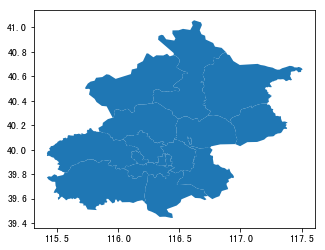

In [62]:
nbhd_gpd.plot()

#### 3.2 房源标点
通过房源经纬度转换为点数据

In [63]:
def df_to_gpd(df, label_longitude, label_latitude):
    df["geometry"] = list(zip(df[label_longitude],df[label_latitude]))
    df["geometry"] = df["geometry"].apply(Point)
    df = gpd.GeoDataFrame(df)
#     df.crs = {'init':'epsg:4326'}
    del df[label_latitude]
    del df[label_longitude]
    return df

listings_gpd = df_to_gpd(listings_df, "longitude", "latitude")
listings_gpd.head(3)

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区 / Chaoyang,Entire home/apt,792,1,89,2019-03-04,0.85,9,341,POINT (116.45163 39.89503)
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云县 / Miyun,Private room,1201,1,2,2017-10-08,0.10,4,0,POINT (117.17231 40.68434)
2,128496,Heart of Beijing: House with View 2,467520,Cindy,东城区,Entire home/apt,389,3,259,2019-02-05,2.70,1,93,POINT (116.422 39.93213)


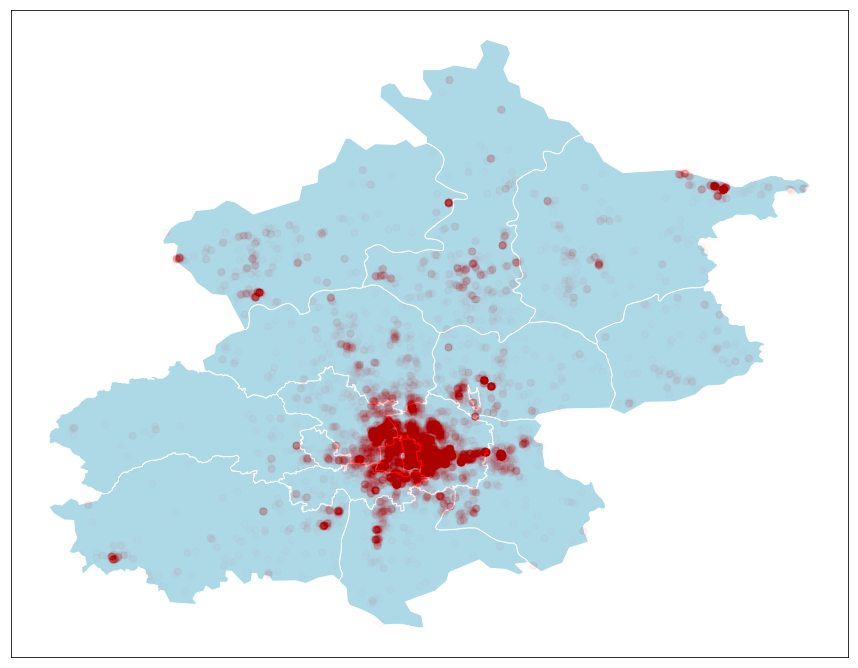

In [64]:
base = nbhd_gpd.plot(color='lightblue', edgecolor='white',figsize=(15, 15))
listings_gpd.plot(ax=base, color='red', marker="o", markersize=50, alpha=0.01) #在底图上叠加餐厅点数据
plt.gca().xaxis.set_major_locator(plt.NullLocator())#去掉x轴刻度
plt.gca().yaxis.set_major_locator(plt.NullLocator())#去掉y轴刻度

#### 3.3 通过颜色深浅表示底图各区域房源数量

首先要通过listings表聚合计算各区的案例总数，类似SQL的groupby

*注意：groupby方法返回一个Series，需要将其转换为包含neighbourhood和count两列的DataFrame格式，以便后续操作*

In [65]:
nbhd_groupby = listings_gpd.groupby("neighbourhood").size() # Series格式
nbhd_groupby = nbhd_groupby.to_frame().reset_index() # 转换为dataframe格式
nbhd_groupby.columns = ["neighbourhood", "count"] # 更改列名，方便操作
nbhd_groupby.head(3)

,neighbourhood,count
0,东城区,3346
1,丰台区 / Fengtai,1758
2,大兴区 / Daxing,823


将得到的groupby对象与neibourhood表使用pd.merge()方法合并，类似SQL的JOIN

In [66]:
nbhd_groupby_join = pd.merge(nbhd_gpd, nbhd_groupby, on="neighbourhood", how="left")
nbhd_groupby_join.head(3)

,neighbourhood,neighbourhood_group,geometry,count
0,东城区,None,"(POLYGON ((116.442305 39.9018, 116.442461 39.9...",3346
1,西城区,None,"(POLYGON ((116.391555 39.897097, 116.391571 39...",1701
2,昌平区,None,"(POLYGON ((116.042739 40.084058, 116.037504 40...",1034


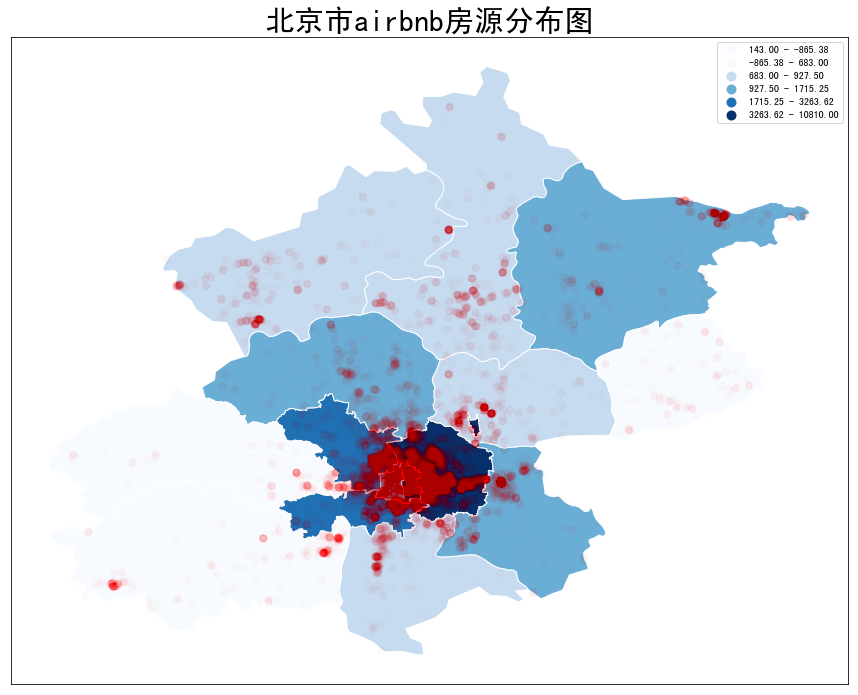

In [67]:
base = nbhd_groupby_join.plot(column="count", cmap='Blues', scheme="boxplot"
                              , edgecolor='white',legend=True, figsize=(15, 15))
listings_gpd.plot(ax=base, color='red', marker="o", markersize=50, alpha=0.01) #在底图上叠加房源点数据
plt.title("北京市airbnb房源分布图", fontsize=30)
plt.gca().xaxis.set_major_locator(plt.NullLocator())#去掉x轴刻度
plt.gca().yaxis.set_major_locator(plt.NullLocator())#去掉y轴刻度

GeoDataFrame.plot方法可以设置scheme参数，让plot更美观，前提需要引入mapclassify包。

Scheme must be in the set: dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'])